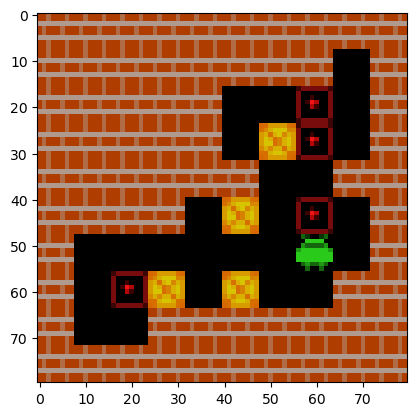

In [32]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from gym_csokoban.envs.csokoban import cSokoban
import gym_sokoban
import gym_csokoban
import gym
import pkg_resources

import importlib.util
import sys
spec = importlib.util.spec_from_file_location("atari_wrappers", "../torchbeast/torchbeast/atari_wrappers.py")
atari_wrappers = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = atari_wrappers
spec.loader.exec_module(atari_wrappers)

small = True
#env = gym.make("Sokoban-v0")
env = gym.make("cSokoban-v0")
#env = cSokoban(small=small)
obs = env.reset()
plt.imshow(obs)
plt.show()

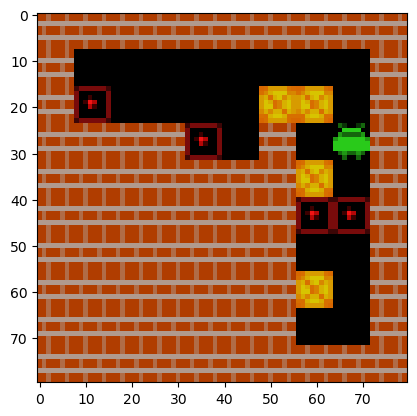

-0.01 False {'step_n': 3}


In [2]:
obs, reward, done, info = env.step(0)
plt.imshow(obs)
plt.show()
print(reward, done, info)

In [44]:
state = env.clone_state()

In [47]:
env.restore_state(state)

In [3]:
def f(n):
    level_dir = pkg_resources.resource_filename('gym_csokoban', '/'.join(('envs', 'boxoban-levels', 'unfiltered', 'train')))
    img_dir = pkg_resources.resource_filename('gym_csokoban', '/'.join(('envs','surface')))
    env = cSokoban(small=True, level_dir=level_dir.encode('UTF-8'), img_dir=img_dir.encode('UTF-8'))
    env.reset()
    for _ in range(n):
        a = np.random.randint(4)    
        obs, reward, done, info = env.step(a)
        if done: 
            env.reset()

def g(n):        
    env_ = gym.make("Sokoban-v0")
    env_ = atari_wrappers.WarpFrame(env_)
    env_.reset()
    for _ in range(n):
        a = np.random.randint(4)   
        obs, reward, done, info = env_.step(a)
        if done: env_.reset()  
        
def h(n):        
    env_ = gym.make("cSokoban-v0", small=True)
    env_.reset()
    for _ in range(n):
        a = np.random.randint(4)   
        obs, reward, done, info = env_.step(a)
        if done: env_.reset()          

In [19]:
%time f(10000)        

CPU times: user 117 ms, sys: 4.62 ms, total: 121 ms
Wall time: 107 ms


In [20]:
%time g(10000)  

CPU times: user 999 ms, sys: 11.8 ms, total: 1.01 s
Wall time: 1.04 s


In [21]:
%time h(10000)  

CPU times: user 129 ms, sys: 8.57 ms, total: 138 ms
Wall time: 131 ms


0: Success check for 1138 step


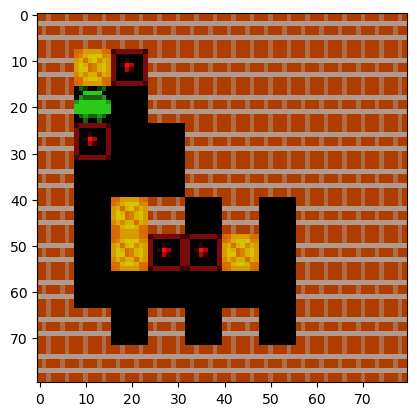

In [7]:
# verify that the results of two envs are the same

for m in range(1):
    room_id = np.random.randint(1000*900)

    env = atari_wrappers.EnvWrapper(gym.make("cSokoban-v0"), noop=True, name="cSokoban-v0")
    obs = env.reset(room_id=room_id)
    env_ = atari_wrappers.EnvWrapper(gym.make("Sokoban-v0"), noop=True, name="Sokoban-v0")
    obs_ = env_.reset(room_id=room_id)
    env_.env.env._elapsed_steps = env.step_n
    state = None

    n = 0
    for n in range(10000):
        a = np.random.randint(4)    
        obs, reward, done, info = env.step(a)
        obs_, reward_, done_, info_ = env_.step(a)    
        c = np.random.rand() < 0.1
        r = np.random.rand() < 0.9
        if c:
            state = env.clone_state()
            state_ = env_.clone_state()

        if r and state is not None:
            env.restore_state(state)
            env_.restore_state(state_)
        
        assert np.all(obs == obs_), "misalignment at step %d" % n
        assert reward == reward_, "misalignment at step %d" % n
        assert done == done_, "misalignment at step %d" % n
        if done: break

    print("%d: Success check for %d step" % (m, n))
    
plt.imshow(np.transpose(obs, axes=(1, 2, 0)))
plt.show()

In [32]:
type(round(reward,2))

float